#### Lecture 11 - ODEs: Runge-Kutta Methods

##### C&C Example 25.8

Solve $f(x,y) = 4e^{0.8x} - 0.5y$ with initial condition $y(0)=2$ over the interval $x \in [0,4]$.

- Use Euler, Midpoint, Heun, and RK4 with various step sizes
- Compare to exact answer y(4)=75.33896
- Create log-log plot of percent relative error vs. computational effort
- Effort = number of evaluations of $f(x,y)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

def f(x,y): # rate function
    return 4 * np.exp(0.8 * x) - 0.5 * y


Define our methods to take the rate function, initial condition, the step size `h`, and the min/max values of the independent variable (in this case `x`). The methods should return the vectors `x` and `y` along with the number of function evaluations `nfe`.

In [3]:
def euler(f, y0, xmin, xmax, h):
    
    x = np.arange(xmin, xmax+h, h)
    y = np.zeros(len(x)) 

    y[0] = y0           
    for i in range(len(x)-1):
        y[i+1] = y[i] + f(x[i],y[i]) * h
    
    nfe = len(x)
    return x,y,nfe

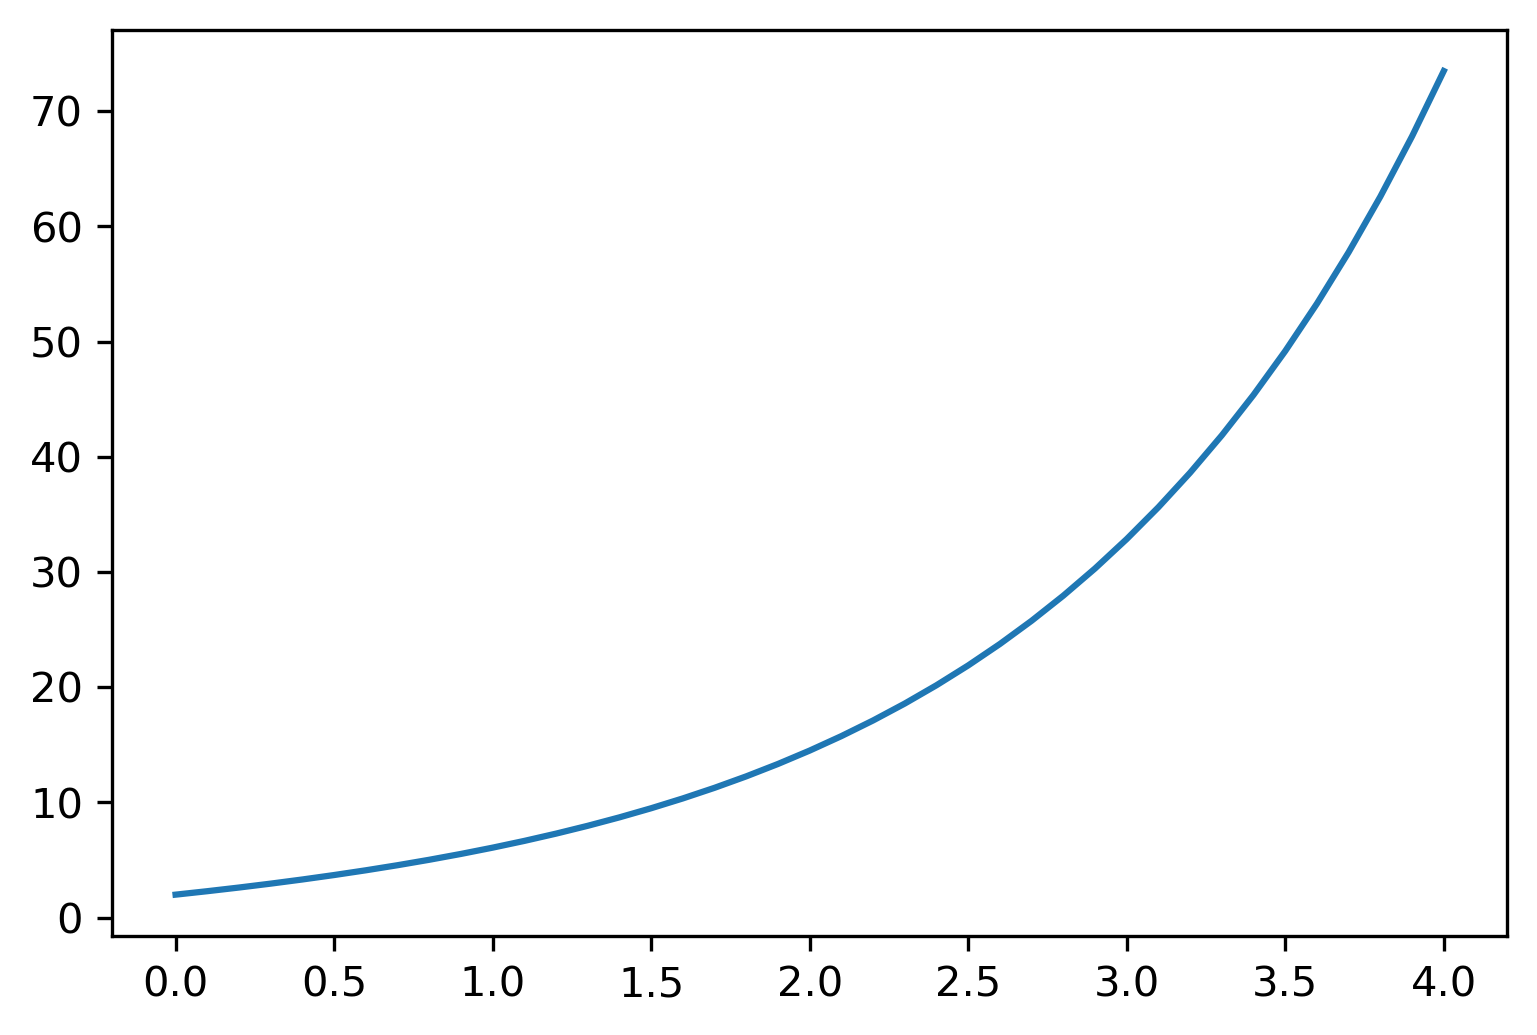

In [4]:
# run one example
x,y,nfe = euler(f, y0=2, xmin=0, xmax=4, h=0.1)
plt.plot(x,y)
plt.show()

Using this step size $h=0.1$, the percent relative error is:

In [5]:
err_euler = 100 * np.abs(y[-1] - 75.33896) / 75.33896
print('Error: %0.2f %%' % err_euler)

Error: 2.45 %


Implement other methods before testing across step sizes. Follow the same structure.

In [6]:
def midpoint(f, y0, xmin, xmax, h):
    
    x = np.arange(xmin, xmax+h, h)
    y = np.zeros(len(x)) 

    y[0] = y0           
    for i in range(len(x)-1):
        y_mid = y[i] + f(x[i],y[i]) * h/2 # half euler step
        y[i+1] = y[i] + f(x[i] + h/2, y_mid) * h
    
    nfe = len(x) * 2 # two function evaluations per step
    return x,y,nfe

In [7]:
def heun(f, y0, xmin, xmax, h):
    
    x = np.arange(xmin, xmax+h, h)
    y = np.zeros(len(x)) 

    y[0] = y0           
    for i in range(len(x)-1):
        y_guess = y[i] + f(x[i],y[i]) * h # full euler step
        y[i+1] = y[i] + (f(x[i],y[i]) + f(x[i]+h, y_guess)) * h / 2
    
    nfe = len(x) * 2
    return x,y,nfe

In [8]:
def RK4(f, y0, xmin, xmax, h):
    
    x = np.arange(xmin, xmax+h, h)
    y = np.zeros(len(x)) 

    y[0] = y0           
    for i in range(len(x)-1):
        k1 = f(x[i], y[i]) # euler slope
        k2 = f(x[i] + h/2, y[i] + k1 * h/2) # midpoint slope using k1
        k3 = f(x[i] + h/2, y[i] + k2 * h/2) # midpoint slope using k2
        k4 = f(x[i] + h, y[i] + k3 * h) # full step using k3
        phi = (k1 + 2*k2 + 2*k3 + k4) / 6 # weighted average
        y[i+1] = y[i] + phi * h
    
    nfe = len(x) * 4 # 4 function evaluations per step
    return x,y,nfe

Use all methods to plot solutions with $h=0.1$.

Error: 2.45 %
Error: 0.10 %
Error: 0.01 %
Error: 0.00 %


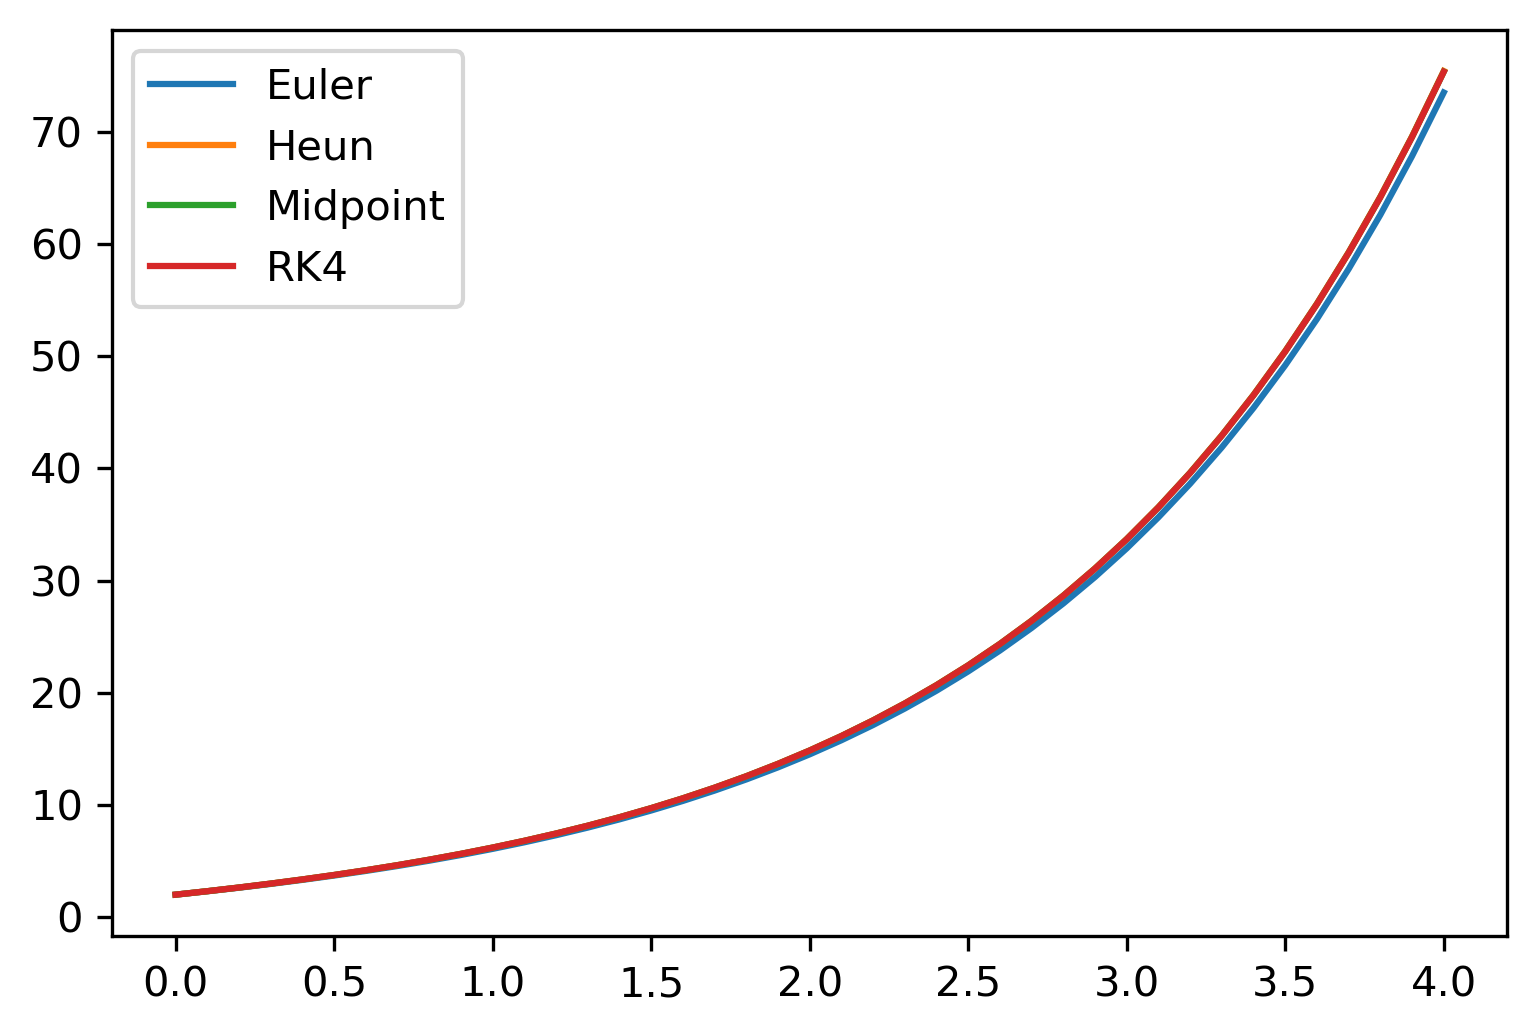

In [9]:
for method in [euler, heun, midpoint, RK4]: # loop over functions
    x,y,nfe = method(f, y0=2, xmin=0, xmax=4, h=0.1)
    error = 100 * np.abs(y[-1] - 75.33896) / 75.33896
    print('Error: %0.2f %%' % error)
    plt.plot(x,y)

plt.legend(['Euler', 'Heun', 'Midpoint', 'RK4'])
plt.show()

Now test the error behavior as a function of effort. Use step sizes $h = 4, 0.04, 0.004, ...$ (5 points total). Inside this loop we are only storing the error and effort. The solutions $y(x)$ are not stored.

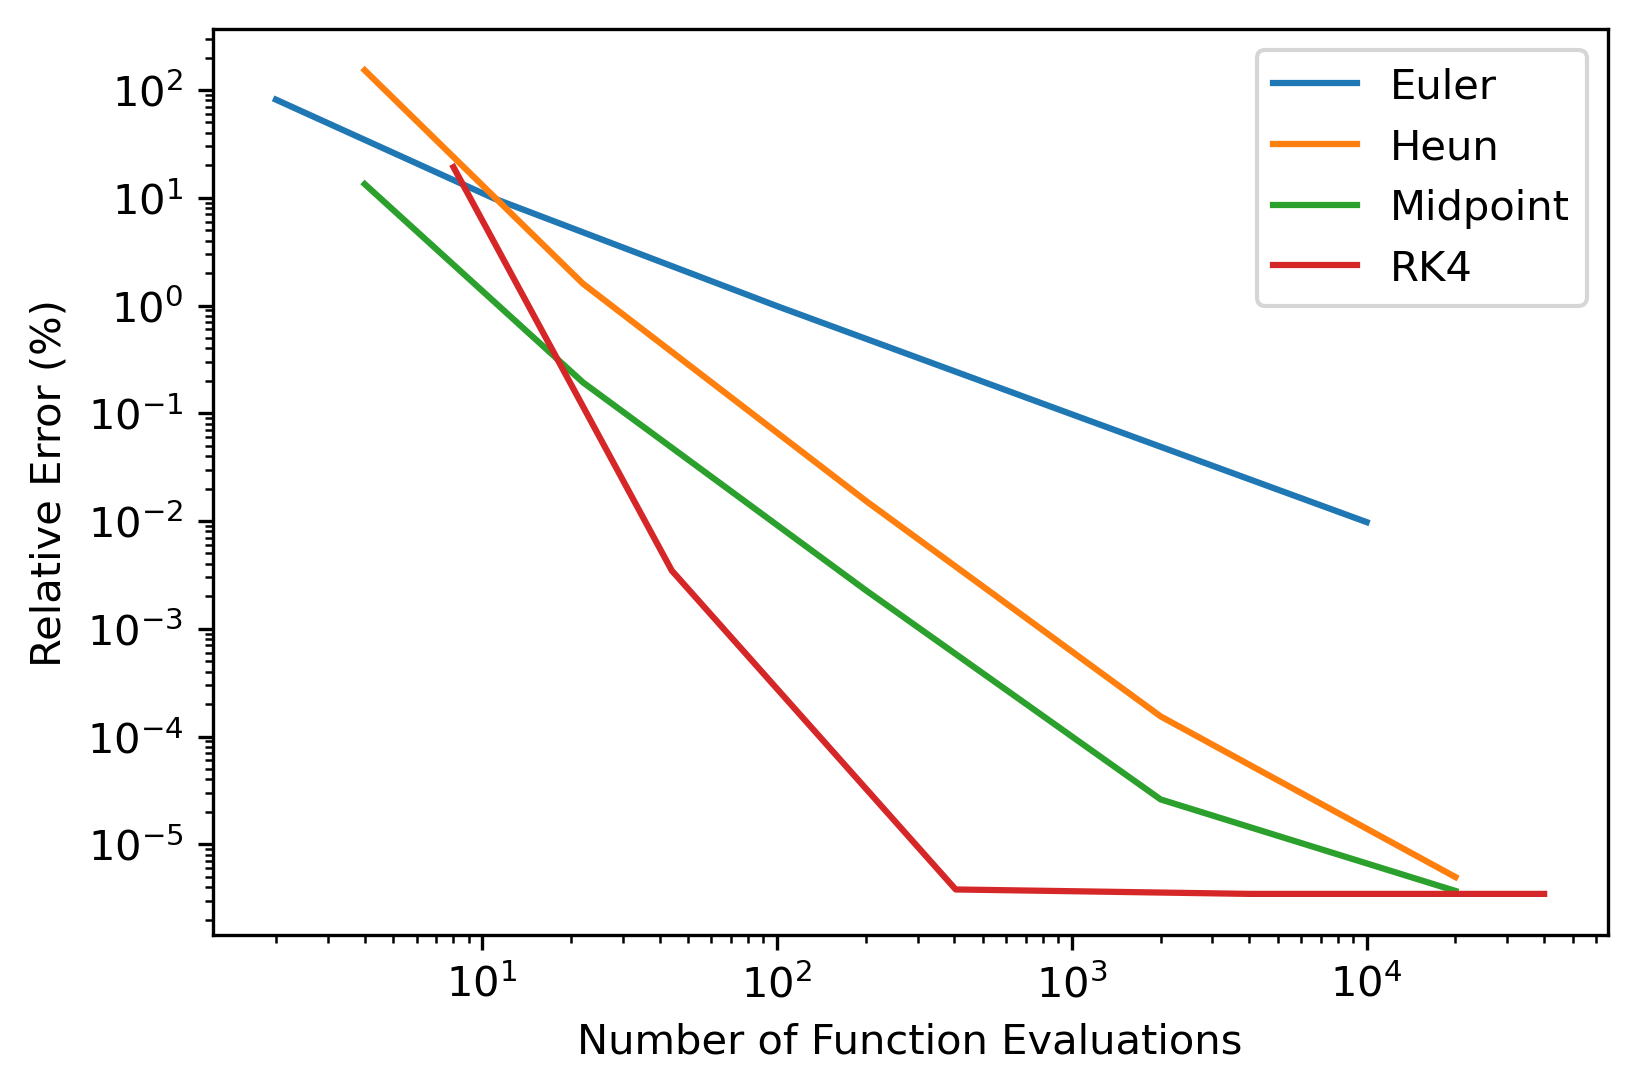

In [10]:
num_points = 5
exact = 75.33896

for method in [euler, heun, midpoint, RK4]: # loop over functions
    error = np.zeros(num_points)
    effort = np.zeros(num_points)
    
    for i in range(num_points): # step sizes h=4, 0.4, 0.04, ...
        x,y,nfe = method(f, y0=2, xmin=0, xmax=4, h=4/10**i)
        error[i] = 100 * np.abs(y[-1] - exact) / exact
        effort[i] = nfe
    
    plt.loglog(effort,error)

plt.ylabel('Relative Error (%)')
plt.xlabel('Number of Function Evaluations')
plt.legend(['Euler', 'Heun', 'Midpoint', 'RK4'])
plt.show()


At finer step sizes the higher-order methods start to encounter a precision limit. The left side of the graph shows the truncation error behavior we would expect. For example, the RK4 error decreases about 4 orders of magnitude for every 1 order of magnitude increase in the computational effort.

##### Fishery management problem

Logistic growth model of a fish population with harvesting:

$$ \frac{dP}{dt} = rP(1-\frac{P}{K}) - hP $$

Given $K=10$, $r=1$, and initial condition $P(0)=2$

Use any RK method to solve over $t \in [0,10]$ with $dt = 0.01$. Try different harvesting rates $h=0.1, 0.5, ...$ What is the largest value of $h$ that still allows a sustainable population? 

Note $h$ is the harvesting rate, not the step size $dt$. Also here the independent variable is $t$ but our functions above use $x$.

This problem is modified from Chapter 1.3 of the SIMIODE textbook.

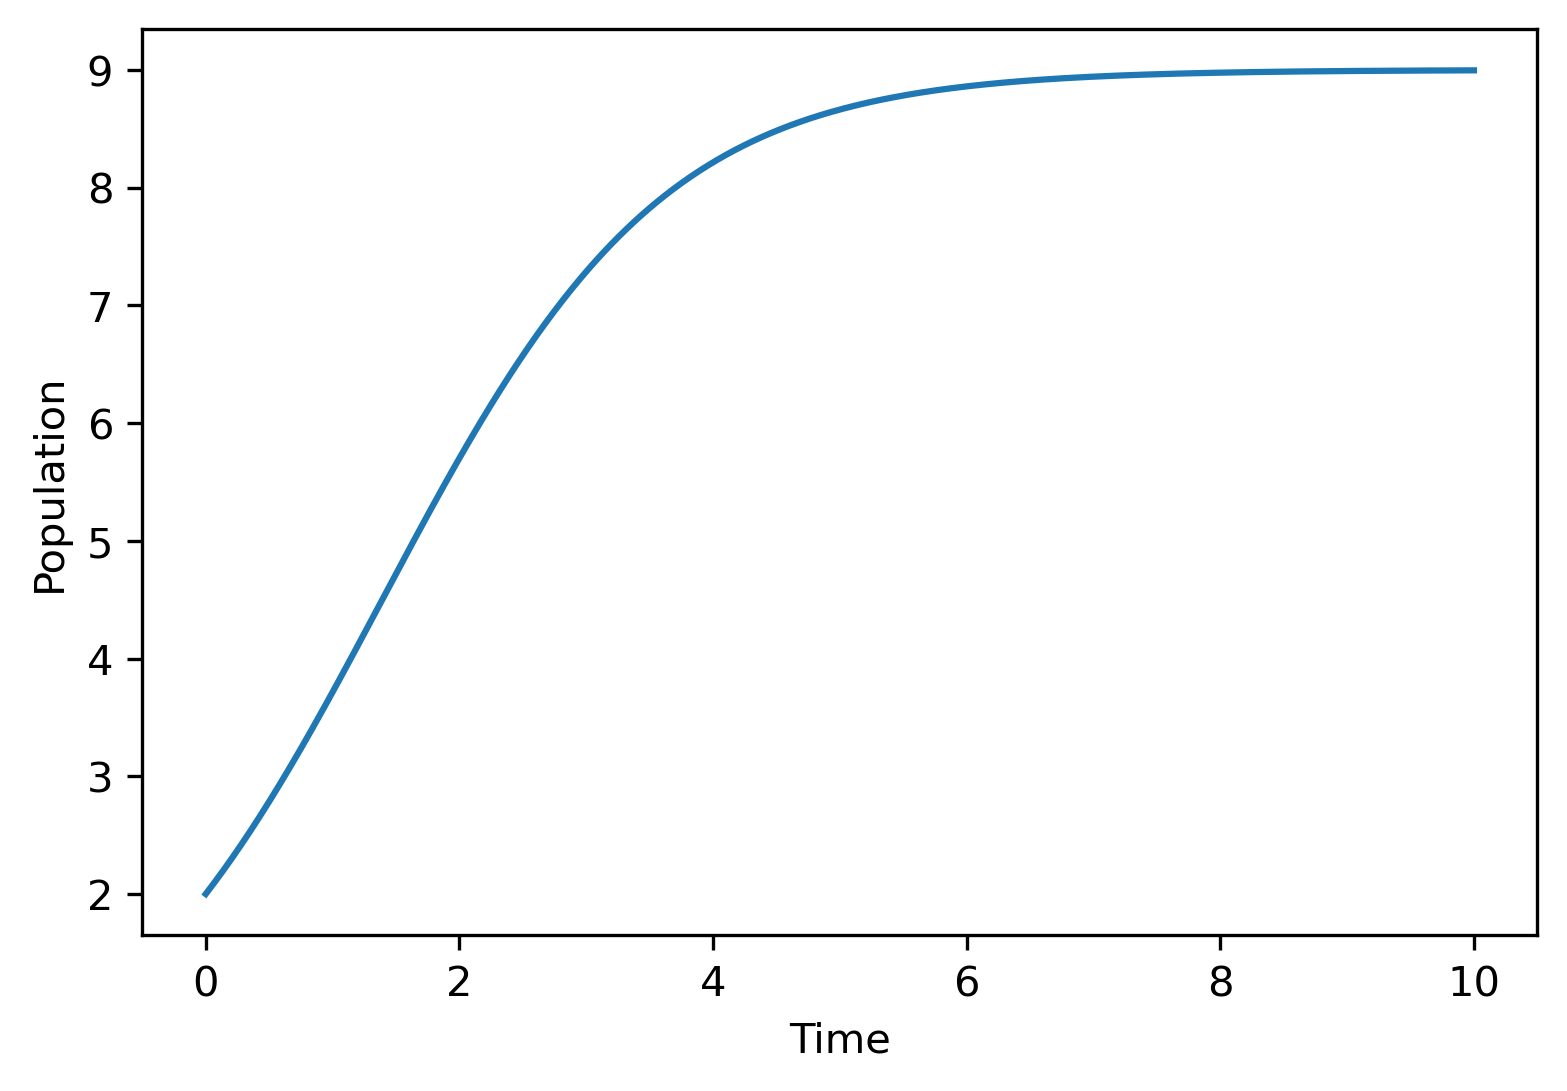

In [11]:
r = 1
K = 10
h = 0.1

def f(t,P): # rate function f(x,y)
    return r * P * (1 - P / K) - h * P

t,P,nfe = RK4(f, 2, 0, 10, 0.01)
plt.plot(t,P)
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()

The population approaches a steady state, but it is not quite the carrying capacity $K$ due to harvesting. We can solve analytically for the steady-state population (that is, when $dP/dt = 0$). The equation has two roots:

$$ P_{ss} = 0,  \space P_{ss} = K(r-h)/r$$

In [12]:
print('Steady state population: ', K*(r-h)/r)

Steady state population:  9.0


What happens with larger harvesting rates? Notice that $r \leq h$ will cause the unsustainable equilibrium $P_{ss}=0$ to occur. It may take more timesteps to see this happen. The harvesting rate must be less than the intrinsic growth rate to have a sustainable population.

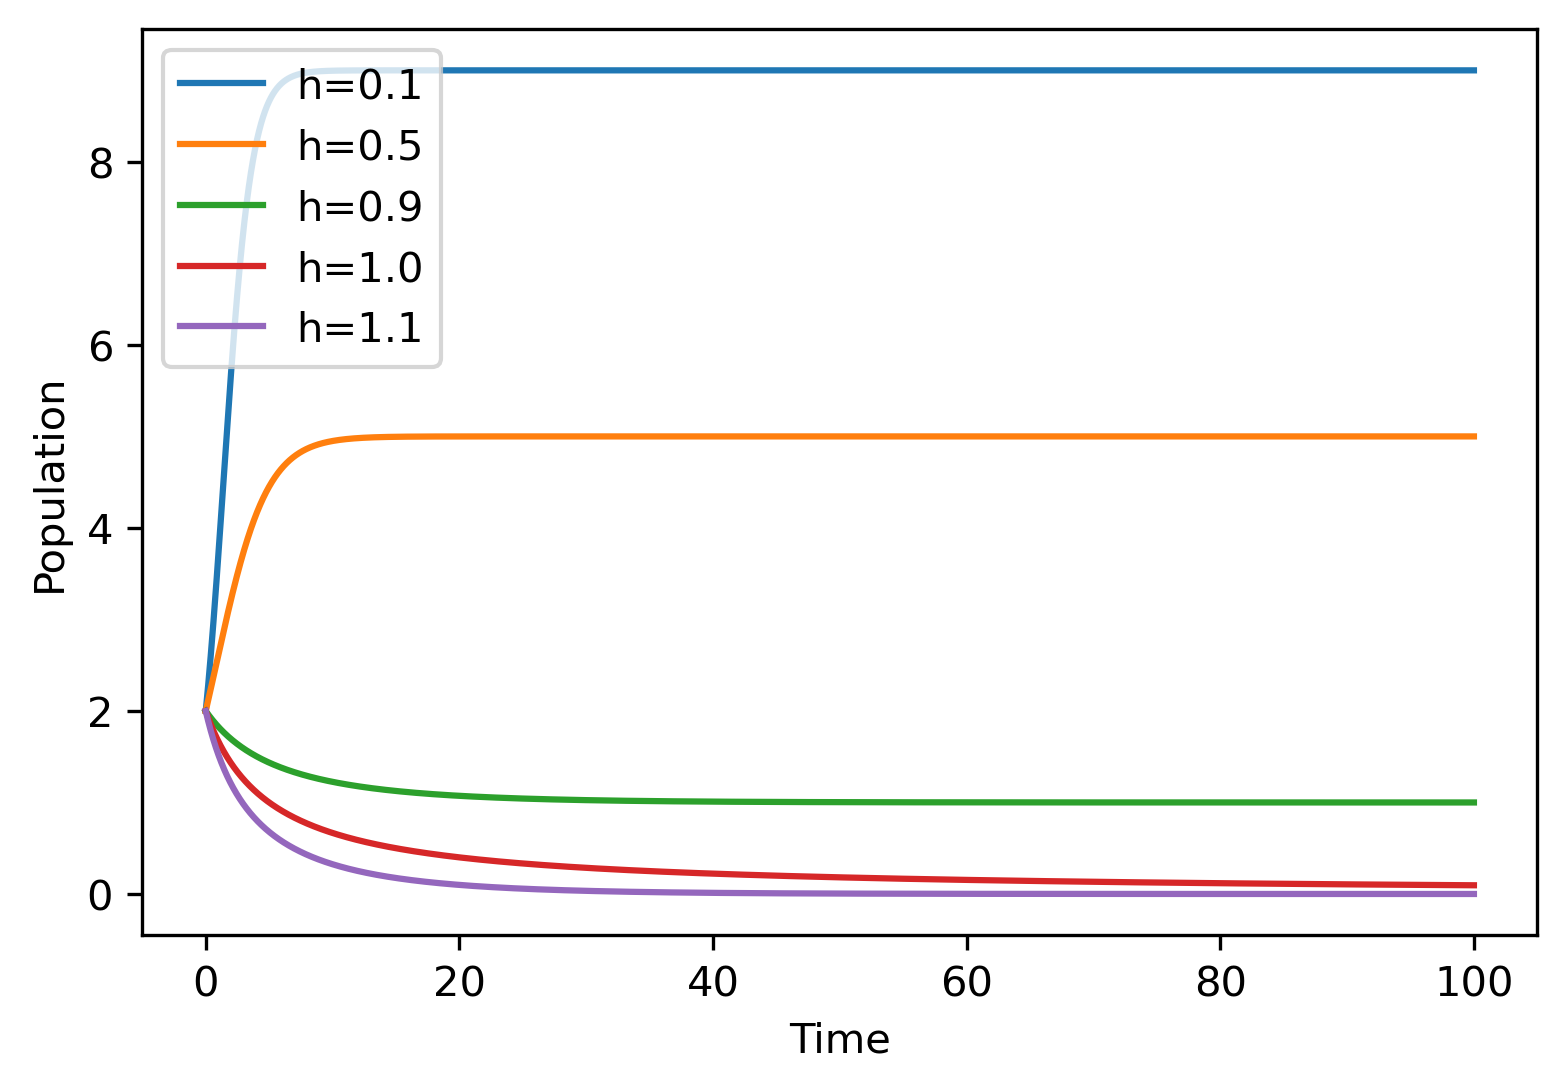

In [14]:
for h in [0.1, 0.5, 0.9, 1.0, 1.1]:
    t,P,nfe = RK4(f, 2, 0, 100, 0.01)
    plt.plot(t,P)

plt.legend(['h=0.1', 'h=0.5', 'h=0.9', 'h=1.0', 'h=1.1'])
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()